# 1er sprint

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

def plot_navigation_problem(grid_size, start_position, goal_position, agent_position, holes):
    """Plots a navigation problem on a grid with agent, start, goal, and holes marked in RGB colors.

    Args:
        grid_size: The size of the grid.
        start_position: The start position of the agent.
        goal_position: The goal position of the agent.
        agent_position: The current position of the agent.
        holes: An array of coordinates representing the hole positions.
    """

    # Create a grid as a 3-channel RGB image.
    grid = np.zeros((grid_size, grid_size, 3), dtype=np.uint8)

    # Set the RGB colors for start, goal, agent, and holes.
    start_color = (255, 0, 0)  # Red for start
    goal_color = (0, 255, 0)   # Green for goal
    agent_color = (0, 0, 255)  # Blue for agent
    hole_color = (255, 255, 255)  # White for holes

    # Mark the start, goal, agent, and hole positions with their respective colors.
    grid[start_position[0], start_position[1]] = start_color
    grid[goal_position[0], goal_position[1]] = goal_color
    grid[agent_position[0], agent_position[1]] = agent_color

    for hole in holes:
        grid[hole[0], hole[1]] = hole_color

    # Plot the grid.
    plt.imshow(grid)

    # Add labels to the axes.
    plt.xlabel('X')
    plt.ylabel('Y')

    # Set the title of the plot.
    plt.title('Navigation problem on a {}x{} grid'.format(grid_size, grid_size))

    # Show the plot.
    plt.show()

def generate_random_holes(grid_size, num_holes):
    
    """Generate random hole coordinates that are not at the beginning nor at the end.

    Args:
        grid_size: The size of the grid.
        num_holes: The number of random holes to generate.

    Returns:
        A list of unique (x, y) coordinates for the holes.
    """
    if num_holes >= 2 and num_holes <= grid_size - 2:
        # Generate a list of all possible coordinates except the beginning and end.
        possible_coordinates = [(x, y) for x in range(1, grid_size - 1) for y in range(1, grid_size - 1)]
        
        # Randomly select unique coordinates for the holes.
        random_holes = random.sample(possible_coordinates, num_holes)
        
        return random_holes
    else:
        raise ValueError("Number of holes should be between 2 and grid_size - 2")
# Example usage:

def move_agent(agent_position, direction):
    # Define possible directions (up, down, left, right)
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    
    # Calculate the new position based on the chosen direction
    new_position = (agent_position[0] + direction[0], agent_position[1] + direction[1])
    
    return new_position

def is_valid_move(new_position, grid_size):
    # Check if the new position is within the grid boundaries
    if 0 <= new_position[0] < grid_size and 0 <= new_position[1] < grid_size:
        return True
    else:
        return False

#  Define the grid size, start, goal, and holes
grid_size = 30
start_position = (0, 0)
goal_position = (29, 29)
agent_position = (1, 1)
num_holes = 20

holes = generate_random_holes(grid_size, num_holes)

# Initialize the plot outside of the loop
plot_navigation_problem(grid_size, start_position, goal_position, agent_position, holes=holes)

# Main agent navigation loop
while agent_position != goal_position:
    # Get user input for the agent's next move
    move = input("Enter a move (W for up, S for down, A for left, D for right): ").upper()

    if move not in ['W', 'S', 'A', 'D']:
        print("Invalid move. Use W, S, A, or D.")
        continue

    if move == 'W':
        direction = (-1, 0)  # Move up
    elif move == 'S':
        direction = (1, 0)   # Move down
    elif move == 'A':
        direction = (0, -1)  # Move left
    elif move == 'D':
        direction = (0, 1)   # Move right

    new_position = move_agent(agent_position, direction)

    if is_valid_move(new_position, grid_size):
        if new_position in holes:
            print("Agent landed on a hole. Game over!")
            break
        agent_position = new_position
    else:
        print("Agent hit a wall. Game over!")
        break

    # Update the displayed plot with the new grid
    plot_navigation_problem(grid_size, start_position, goal_position, agent_position, holes=holes)
    plt.pause(0.1)

if agent_position == goal_position:
    print("Agent reached the goal! You won!")

# Show the final plot
plt.show()

# 2do sprint


## Random Agent with NN

In [ ]:
nums = []
new_nums = []
a= 0

for i in range(100000):
    a+=1
    if a%1000 == 0:
        print(a)

    grid_size = 30
    num_holes = 20

    env = Environment(grid_size, num_holes)
    neural_network = NeuralNetwork(9, 4)  # Adjust input and output sizes as needed
    random_agent = NeuralNetworkAgent(neural_network)
    game = Game(env, random_agent, neural_network, False)
    win_counts = 0
    for i in range(2):
        game.play(random_moves=True)
        if game.final == True:
            new_nums.append(game.counter)
            win_counts +=1
            if win_counts == 5:
                print('gano 5')
                win_nn = neural_network
                break
            new_env = Environment(grid_size, num_holes)
            new_agent = NeuralNetworkAgent(neural_network)
            game = Game(new_env, new_agent, neural_network, False)
            print('new game')
        else:
            break
    
    if win_counts == 5:
        break
        
    nums.append(game.counter)

## GA optimization


In [1]:
#specific_holes = [(0, 11), (0, 23), (0, 18), (3, 29), (5, 29), (7, 29), (10, 29), (13, 29), (16, 29), (19, 29), (22, 29), (26, 29), (29, 23), (29, 20), (29, 17), (29, 14), (29, 9), (29, 4), (29, 2), (26, 0), (24, 0), (22, 0), (20, 0), (18, 0), (16, 0), (13, 0), (11, 1), (7, 0), (6, 0), (4, 0), (3, 0), (11, 0), (11, 2), (10, 2), (10, 3), (9, 5), (8, 6), (7, 6), (6, 7), (6, 8), (5, 8), (8, 5), (7, 7), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (7, 17), (6, 18), (7, 16), (8, 16), (9, 16), (5, 26), (6, 26), (7, 26), (8, 26), (9, 26), (11, 26), (10, 26), (12, 26), (13, 26), (14, 26), (15, 26), (5, 25), (6, 25), (8, 25), (7, 25), (9, 25), (10, 25), (11, 25), (12, 25), (13, 25), (14, 25), (15, 25), (10, 16), (11, 16), (12, 16), (13, 16), (14, 16), (15, 16), (16, 16), (7, 18), (7, 19), (5, 19), (6, 19), (9, 3), (9, 4), (5, 1), (5, 0), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (17, 15), (16, 26), (16, 25), (17, 25), (17, 24), (18, 25), (18, 24), (18, 23), (19, 24), (19, 23), (19, 22), (20, 22), (20, 21), (20, 20), (20, 23), (20, 19), (21, 22), (21, 21), (21, 20), (21, 19), (21, 18), (22, 18), (22, 19), (22, 17), (23, 18), (23, 15), (23, 16), (17, 14), (17, 13), (17, 12), (17, 16), (17, 11), (17, 10), (17, 9), (17, 8), (18, 8), (19, 8), (20, 8), (21, 8), (22, 8), (23, 8), (24, 8), (25, 8), (26, 8), (27, 8), (28, 8), (29, 8), (28, 9), (29, 10), (23, 17), (5, 27), (5, 28)]
specific_holes = [(5,5)]
len(specific_holes)


1

In [2]:
from Enviroment import Environment
from Game import Game
from Agent import NeuralNetworkAgent
from NeuralNetwork import NeuralNetwork
from GeneticAlgorithm import GeneticAlgorithm

def play_game(agent):
    grid_size = 30
    num_holes = 28
    env = Environment(grid_size, num_holes, specific_holes)
    game = Game(env, agent, False)
    game.play(random_moves=True)

    return game.counter , game.final , game.crash

def fitness_function(individuo):
        a_perf = 0
        for _ in range(50):
            agente = NeuralNetworkAgent(neural_network=individuo)
            perf , win , crash = play_game(agente)
            if win:
                a_perf += 20000
                a_perf -= perf
            else:
                if crash:
                     a_perf += perf
                     a_perf -= 10
                else:
                    a_perf += perf
        #print(perf , '  ' , stop)
        return a_perf

ga = GeneticAlgorithm(population_size=50, fitness_function=fitness_function)
ga.run(generations=500)



## Ideas 3rd Sprint:
## Crear un camino y optimizar el agente para que lo siga
## Incluir la direccion de la meta como parametro
## Creaer un algoritmo mas elitista y con 20 carreras x fitnes.
## Como aceleramos el proceso de evaluacion? multiprocessing.
## Los mejores agentes de cada ronda deben converger en llegar siempre a la meta en las 20 carreras.
## que el comienzo y la llegada sea variables.
## agregar varios goals, y la distacia al mas cercano.

Generation 0: Best Fitness = -383
Generation 1: Best Fitness = 950
Generation 2: Best Fitness = 1042
Generation 3: Best Fitness = 59733
Generation 4: Best Fitness = 997100
Generation 5: Best Fitness = 997100


KeyboardInterrupt: 

In [3]:
from Enviroment import Environment
from Game import Game
from Agent import NeuralNetworkAgent
from NeuralNetwork import NeuralNetwork
from GeneticAlgorithm import GeneticAlgorithm

import numpy as np
import matplotlib.pyplot as plt
import imageio
import numpy as np
import imageio


def play_game(agent):
    grid_size = 30
    num_holes = 2
    env = Environment(grid_size, num_holes , specific_holes)
    game = Game(env, agent, True)
    game.play(random_moves=True)

    return game.counter , game.final , game , env


        
neural_network = NeuralNetwork(9, 4)
bnn = ga.best_individual
agente = NeuralNetworkAgent(neural_network=bnn)

perf , final , game , env= play_game(agente)

print(perf)
print(final)



def create_bigger_grid(state, target_size=1000):
  """Creates a bigger grid from a smaller grid with the same elements.

  Args:
    state: A NumPy array representing the smaller grid.
    target_size: The desired size of the bigger grid.

  Returns:
    A NumPy array representing the bigger grid.
  """

  # Calculate the scaling factor.
  scaling_factor = target_size / state.shape[0]

  # Create a bigger grid.
  bigger_grid = np.zeros((target_size, target_size, state.shape[2]), dtype=state.dtype)

  # Copy the elements of the smaller grid to the bigger grid and add a 10px circle
  # around each element.
  for i in range(state.shape[0]):
    for j in range(state.shape[1]):
      bigger_grid[int(i * scaling_factor):int(i * scaling_factor + 11),
                   int(j * scaling_factor):int(j * scaling_factor + 11), :] = state[i, j, :]

  # Return the bigger grid.
  return bigger_grid

def create_gif_from_states(states, output_filename, duration=0.1):
    images = []

    for state in states:
        # Assuming state is a 3D NumPy array
        bigger_grid = create_bigger_grid(state)
        image = np.uint8(bigger_grid)

        # Resize the image to 1000x1000 pixels
        images.append(image)

    # Save the images as a GIF
    imageio.mimsave(output_filename, images, duration=duration)

create_gif_from_states(game.game_movie, 'UI\static\output.gif', duration=2)


58
True


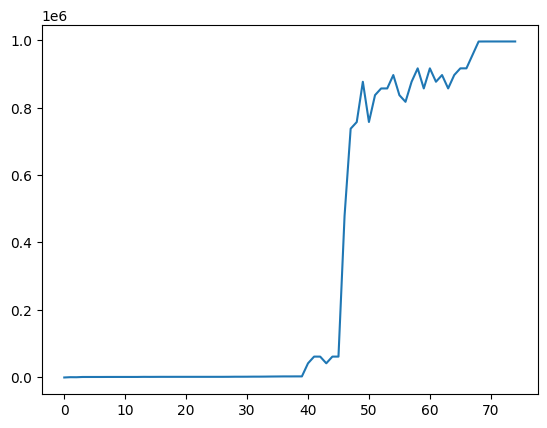

In [35]:
plt.plot(ga.fitness_history)

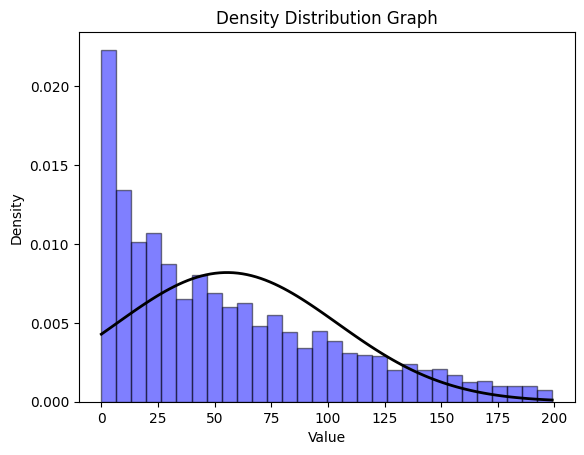

In [115]:
import matplotlib.pyplot as plt
import numpy as np

data = [i for i in nums if i< 200]
# Create a histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', edgecolor='black')

# You can also overlay a probability density function if you have one
# For example, a Gaussian distribution
mu = np.mean(data)
sigma = np.std(data)
x = np.linspace(min(data), max(data), 100)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x, pdf, 'k-', lw=2)

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Distribution Graph')

# Show the graph
plt.show()